# Convolution Neuron Networks with Keras

## Curse of dimensionality

Translational variation - the abiilty to identify an object as a variation - it affects neural network by increasing the dimensions of data.

## CNN Components
    Convolution
    Non-linearity(ReLU)
    Pooling
    classification
    
Convolution
    A convolution operation extracts features from the data source
    - Does this in a way that it preserves the feature spatial relationships sych as edges, composite elements (Nose, eye) with greatly reduced computation
    -It uses a kernel which is passed through the image.the dot product of the kernel and pixel values is summed up to obtain a feature map
    -The filters are what we train and are improved through training
    
Key convolution hyperparameters
    -Kernel size - sets a width and height of each filter that affect the number of output of each convolution. Intuitively it can be the number of pixels that are distance to each other affect the content of the image
    -number of filters
    -stride - how far we slide the filter as we convolve the image
    -padding - 
    
Non - linear activation functin - lets the NN handle non-linear data
added in two ways.
    - As a layer after convolution layer
    - as a parameter to convolution layer
    
Pool Layer - Receives the output of the activation function
    -Reduces dimensionality and the size of data. THis reduces the number of weights that must be trained and controls overfitting
    - creates a more generalized function of our image thus achieving translational variation that we would desire to achieve
    
Having multiple convolution layers means having different layers focusing in learning particular feature in the images


Fashin-MNIST images
- 60000 training images
- 10000 test images
- 20 X 28 X 1 grayscale
- 10 Classes of different types of clothing such as (t-shirt, pullover, coat, sandal, skirt...)


In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
os.environ['IFF_CPP_MIN_LOG_LEVEL'] = '2'

In [14]:

# define some constants
num_classes = 10
epochs = 24
batch_size = 128
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# deal with format issues between different backends

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# Type convert and scale the test and train data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [15]:

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/24
469/469 [==============================] - 12s 26ms/step - loss: 2.3160 - accuracy: 0.0822 - val_loss: 2.2910 - val_accuracy: 0.0717
Epoch 2/24
469/469 [==============================] - 14s 31ms/step - loss: 2.2863 - accuracy: 0.1101 - val_loss: 2.2629 - val_accuracy: 0.1207
Epoch 3/24
469/469 [==============================] - 14s 30ms/step - loss: 2.2574 - accuracy: 0.1405 - val_loss: 2.2364 - val_accuracy: 0.1417
Epoch 4/24
469/469 [==============================] - 13s 29ms/step - loss: 2.2324 - accuracy: 0.1672 - val_loss: 2.2112 - val_accuracy: 0.1878
Epoch 5/24
469/469 [==============================] - 14s 29ms/step - loss: 2.2068 - accuracy: 0.1958 - val_loss: 2.1840 - val_accuracy: 0.2359
Epoch 6/24
469/469 [==============================] - 14s 30ms/step - loss: 2.1795 - accuracy: 0.2268 - val_loss: 2.1545 - val_accuracy: 0.2783
Epoch 7/24
469/469 [==============================] - 14s 30ms/step - loss: 2.1500 - accuracy: 0.2559 - val_loss: 2.1226 - val_accuracy:

NameError: name 'score' is not defined

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 1.329015851020813
Test accuracy 0.6517999768257141


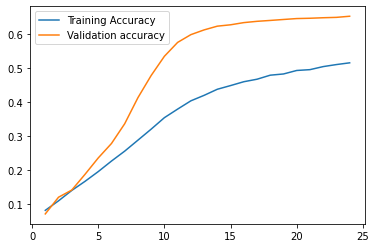

In [19]:

import numpy as np
import matplotlib.pyplot as plt

epoch_list = list(range(1, len(hist.history['accuracy']) +1))
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation accuracy'))
plt.show()